In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [3]:
customer_ds = pd.read_csv('data/customer_data_dirty.csv')
purchase_ds = pd.read_csv('data/purchase_data_dirty.csv')

In [4]:
customer_ds.head()

,CustomerID,Name,Age,Gender,Income
0,101,Amit,25.0,M,45000.0
1,102,Riya,NaN,Female,52000.0
2,103,John,-5.0,Male,60000.0
3,104,Meena,250.0,F,48000.0
4,105,Rahul,35.0,male,NaN


In [5]:
purchase_ds.head()

,PurchaseID,CustomerID,ProductCategory,PurchaseAmount
0,P001,101,Electronics,12000.0
1,P002,102,electronics,NaN
2,P003,103,Furniture,18000.0
3,P004,104,Clothing,8000.0
4,P005,105,Electronics,22000.0


# 1 Handle Missing Value

## i. Replace missing Age with median age

In [26]:
customer_ds['Age'].isna().value_counts()

Age
False    46
True      5
Name: count, dtype: int64

In [33]:
customer_ds['Age'] = customer_ds['Age'].fillna(customer_ds['Age'].median(), inplace=True)
customer_ds['Age']

/tmp/ipykernel_43048/49314642.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  customer_ds['Age'] = customer_ds['Age'].fillna(customer_ds['Age'].median(), inplace=True)


0      25.0
1      34.0
2      -5.0
3     250.0
4      35.0
5      29.0
6      41.0
7      38.0
8      34.0
9      27.0
10     45.0
11     32.0
12     29.0
13     26.0
14    150.0
15     34.0
16     39.0
17     28.0
18     34.0
19     31.0
20     36.0
21     24.0
22    -10.0
23     33.0
24     40.0
25     29.0
26     42.0
27     37.0
28     34.0
29     26.0
30     48.0
31     34.0
32     27.0
33     31.0
34     55.0
35     29.0
36     44.0
37     35.0
38     38.0
39     25.0
40     41.0
41     30.0
42     34.0
43     28.0
44     39.0
45     27.0
46     46.0
47     34.0
48     35.0
49     35.0
50     52.0
Name: Age, dtype: float64

## ii. Replace missing Income with mean income

In [28]:
customer_ds['Income'].isna().value_counts()

Income
False    46
True      5
Name: count, dtype: int64

In [34]:
customer_ds['Income'].mean()

np.float64(56673.913043478264)

In [9]:
customer_ds['Income'] = customer_ds['Income'].fillna(customer_ds['Income'].mean(), inplace=True)

customer_ds['Income']

/tmp/ipykernel_43048/2546894114.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  customer_ds['Income'] = customer_ds['Income'].fillna(customer_ds['Income'].mean(), inplace=True)


0     45000.000000
1     52000.000000
2     60000.000000
3     48000.000000
4     56673.913043
5     55000.000000
6     62000.000000
7     58000.000000
8     70000.000000
9     51000.000000
10    65000.000000
11    54000.000000
12    50000.000000
13    47000.000000
14    43000.000000
15    56673.913043
16    61000.000000
17    52000.000000
18    59000.000000
19    56000.000000
20    60000.000000
21    48000.000000
22    45000.000000
23    53000.000000
24    67000.000000
25    51000.000000
26    64000.000000
27    59000.000000
28    62000.000000
29    48000.000000
30    70000.000000
31    56000.000000
32    49000.000000
33    52000.000000
34    68000.000000
35    56673.913043
36    65000.000000
37    58000.000000
38    61000.000000
39    47000.000000
40    63000.000000
41    54000.000000
42    60000.000000
43    51000.000000
44    62000.000000
45    49000.000000
46    69000.000000
47    56000.000000
48    56673.913043
49    56673.913043
50    72000.000000
Name: Income, dtype: float64

## iii. Replace missing PurchaseAmount with 0

In [36]:
purchase_ds['PurchaseAmount'].isna().value_counts()

PurchaseAmount
False    46
True      7
Name: count, dtype: int64

In [34]:
purchase_ds['PurchaseAmount'] = purchase_ds['PurchaseAmount'].fillna(0)
purchase_ds['PurchaseAmount']

0     12000.0
1         0.0
2     18000.0
3      8000.0
4     22000.0
5     15000.0
6     17000.0
7      9000.0
8     25000.0
9     13000.0
10    20000.0
11        0.0
12    14000.0
13    12000.0
14    16000.0
15     7000.0
16    21000.0
17    15000.0
18        0.0
19     9000.0
20    23000.0
21    11000.0
22    18000.0
23     8500.0
24    26000.0
25    14000.0
26    19500.0
27     9200.0
28        0.0
29    12500.0
30    21000.0
31     8800.0
32    13500.0
33    14500.0
34    22000.0
35        0.0
36    24000.0
37    15500.0
38    19000.0
39     8300.0
40    21500.0
41    13800.0
42        0.0
43     9100.0
44    22500.0
45    14800.0
46    23500.0
47     9500.0
48        0.0
49    26000.0
50    18000.0
51    20000.0
52     7500.0
Name: PurchaseAmount, dtype: float64

# 2. Correct Invalid Values

## Remove records where Age < 0 or Age > 100

In [44]:
customer_ds = customer_ds[
    (customer_ds['Age'] > 0) & (customer_ds['Age'] < 100)
]

customer_ds['Age']

0     25.0
4     35.0
5     29.0
6     41.0
7     38.0
9     27.0
10    45.0
11    32.0
12    29.0
13    26.0
15    34.0
16    39.0
17    28.0
19    31.0
20    36.0
21    24.0
23    33.0
24    40.0
25    29.0
26    42.0
27    37.0
29    26.0
30    48.0
31    34.0
32    27.0
33    31.0
34    55.0
35    29.0
36    44.0
37    35.0
38    38.0
39    25.0
40    41.0
41    30.0
43    28.0
44    39.0
45    27.0
46    46.0
47    34.0
48    35.0
49    35.0
50    52.0
Name: Age, dtype: float64

# 3. Standardize Categorical Values

## i. Convert Gender values to only Male and Female

In [51]:
customer_ds['Gender'].value_counts()

Gender
M         14
F         11
Female     9
male       4
female     2
Male       2
Name: count, dtype: int64

In [54]:
(customer_ds['Gender']
 .str.strip()
 .replace(
     {
         'M': 'Male',
         'male': 'Male',
         'F': 'Female',
         'female': 'Female'
     }
 )
 ).head()

0      Male
4      Male
5    Female
6      Male
7    Female
Name: Gender, dtype: str

## ii. Convert ProductCategory to lowercase

In [56]:
purchase_ds['ProductCategory'].str.lower()

0     electronics
1     electronics
2       furniture
3        clothing
4     electronics
5     electronics
6       furniture
7        clothing
8     electronics
9     electronics
10      furniture
11       clothing
12    electronics
13    electronics
14      furniture
15       clothing
16    electronics
17    electronics
18      furniture
19       clothing
20    electronics
21    electronics
22      furniture
23       clothing
24    electronics
25    electronics
26      furniture
27       clothing
28    electronics
29    electronics
30      furniture
31       clothing
32    electronics
33    electronics
34      furniture
35       clothing
36    electronics
37    electronics
38      furniture
39       clothing
40    electronics
41    electronics
42      furniture
43       clothing
44    electronics
45    electronics
46      furniture
47       clothing
48    electronics
49    electronics
50    electronics
51      furniture
52       clothing
Name: ProductCategory, dtype: str

In [58]:
purchase_ds['ProductCategory'].str.lower().unique()

<StringArray>
['electronics', 'furniture', 'clothing']
Length: 3, dtype: str

# 4. Remove Duplicate Records

## Remove duplicate rows based on CustomerID 

In [65]:
customer_ds['CustomerID'].head()

0    101
4    105
5    106
6    107
7    108
Name: CustomerID, dtype: int64

In [69]:
customer_ds.drop_duplicates(subset=['CustomerID'], inplace=True)
customer_ds['CustomerID']

0     101
4     105
5     106
6     107
7     108
9     110
10    111
11    112
12    113
13    114
15    116
16    117
17    118
19    120
20    121
21    122
23    124
24    125
25    126
26    127
27    128
29    130
30    131
31    132
32    133
33    134
34    135
35    136
36    137
37    138
38    139
39    140
40    141
41    142
43    144
44    145
45    146
46    147
47    148
48    149
50    150
Name: CustomerID, dtype: int64

# 5. Perform equal width binning on the Income attribute

## i. Divide the Income attribute into 4 equal-width bins

## ii. Assign appropriate labels to each bin (Very Low, Low, Medium, High).

## iii. Create a new feature named Income_EqualWidth

In [10]:
customer_ds['Income_EqualWidth'] = pd.cut(
    customer_ds['Income'],
    bins=4,
    labels=['Very Low', 'Low', 'Medium', 'High']
)

customer_ds['Income_EqualWidth'].head(10)

0    Very Low
1         Low
2      Medium
3    Very Low
4         Low
5         Low
6      Medium
7      Medium
8        High
9         Low
Name: Income_EqualWidth, dtype: category
Categories (4, str): ['Very Low' < 'Low' < 'Medium' < 'High']

In [11]:
customer_ds.head()

,CustomerID,Name,Age,Gender,Income,Income_EqualWidth
0,101,Amit,25.0,M,45000.000000,Very Low
1,102,Riya,NaN,Female,52000.000000,Low
2,103,John,-5.0,Male,60000.000000,Medium
3,104,Meena,250.0,F,48000.000000,Very Low
4,105,Rahul,35.0,male,56673.913043,Low


## iv. Plot a histogram showing the distribution of customers across the equal-width bins.

Text(0, 0.5, 'frequency')

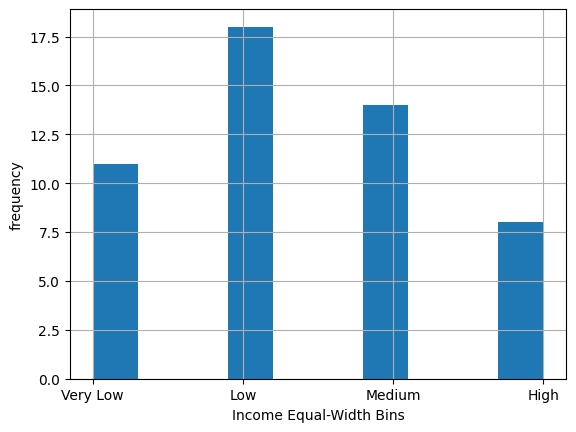

In [43]:
# plt.figure(figsize=(9, 9))
customer_ds['Income_EqualWidth'].hist()
plt.xlabel('Income Equal-Width Bins')
plt.ylabel('frequency')
# plt.grid(True)
# plt.show()

# 6. Perform Equal Frequency Binning

## i. Divide the Income attribute into 4 equal-frequency bins.

## ii. Assign labels (Q1, Q2, Q3, Q4)

## iii. Create a new feature named Income_EqualFrequency

In [23]:
# customer_ds['Income_EqualWidth'] = pd.cut(
#     customer_ds['Income'],
#     bins=4,
#     labels=['Very Low', 'Low', 'Medium', 'High']
# )

customer_ds['Income_EqualFrequency'] = pd.qcut(
    customer_ds['Income'],
    q=4,
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

customer_ds['Income_EqualFrequency'].head()

0    Q1
1    Q2
2    Q3
3    Q1
4    Q2
Name: Income_EqualFrequency, dtype: category
Categories (4, str): ['Q1' < 'Q2' < 'Q3' < 'Q4']

## Plot a bar chart showing the number of customers in each bin

<Axes: xlabel='Income_EqualFrequency'>

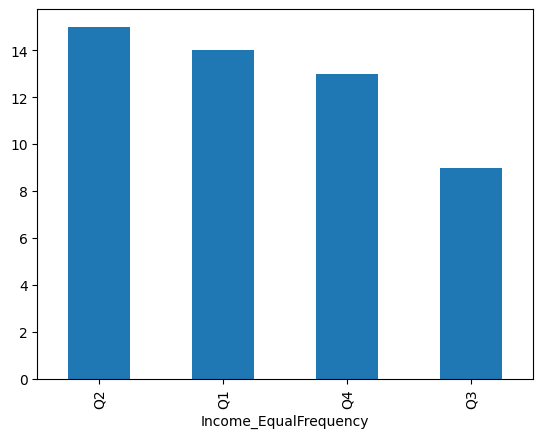

In [31]:
customer_ds['Income_EqualFrequency'].value_counts().plot(kind='bar')

# 7. Outlier detection

## i. Compute Z-scores for PurchaseAmount.

In [41]:
purchase_ds['PurchaseAmount'].head()

0    12000.0
1        0.0
2    18000.0
3     8000.0
4    22000.0
Name: PurchaseAmount, dtype: float64

In [55]:
purchase_ds['Zscore'] = zscore(purchase_ds['PurchaseAmount'])

purchase_ds['Zscore'].head()

0   -0.231364
1   -1.839532
2    0.572720
3   -0.767420
4    1.108776
Name: Zscore, dtype: float64

## ii. Identify records with Z-score > 3 or < −3

In [61]:
(abs(purchase_ds['Zscore']) > 3).value_counts()

Zscore
False    53
Name: count, dtype: int64

## iii. Display the outlier records

In [65]:
print(purchase_ds['Zscore'] if ~(abs(purchase_ds['Zscore']) > 3) else None)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## iv. Remove outliers and recompute the mean

# 8. Data Type Conversion

## Convert Income from string to float

# 9. Normalization

## Normalize Age and Income using Min-Max  scaling

# 10. Dataset Integration

## Perform inner join on CustomerID
(Drop orphan purchase records automatically)

# 11. Feature Creation

## Create a new feature HighSpender
Mark 1 if PurchaseAmount > average, else 0

# 12. OLAP operations

## i. Perform slice operation to get total and average purchase amount for Female customers only

## ii. Perform dice operation for: Gender = Male, ProductCategory = Electronics. 
Display number of purchases and average PurchaseAmount

## iii. Perform roll-up operation to compute total purchase amount by Gender

## iv. Perform drill down operation
Analyze purchase amount by Gender and ProductCategory

# 13. Apply one hot encoding to gender column
Add encoded columns to data set. Drop original gender column